# Задача идентификации потока экспериментальных данных

## Init

### Imports

In [73]:
import numpy as np
import matplotlib.pyplot as plt


### Def-s

In [92]:
def math_expect(s):
    """Вычисление математического ожидания"""
    return sum(s) / len(s)


def dispersion(s, M=None):
    """Вычисление дисперсии.

    Используется M - как математическое ожидание, если оно известно,
    иначе вычисляется
    """
    if M is None:
        M = math_expect(s)
    n = len(s)
    D = 0
    for i in range(n):
        D += (s[i] - M) ** 2
    return D / n


def white_noize():
    s = 0
    for i in range(12):
        s += np.random.random()
    return s - 6


def ud_4_normal_dist(M, D):
    """Вычисление коэффициентов для нормального распределения.

    M - математическое ожидание
    D - дисперсия
    """
    return M, D ** 0.5


def normal_dist_val(lmbd, x):
    return  white_noize()* ( 1- np.exp(-lmbd * x ))


def count_unten(n: float, min_count=5) -> int:
    """Возвращает количество десятков в числе.

    0.1234 -> 4; 0.11 -> 2; 0.1 -> 1
    """
    i = 0
    if n == 0:
        return i
    flag = False
    while True:
        n *= 10
        mod = int(n) % 10
        if not flag and mod != 0:
            flag = True
        if flag and mod == 0:
            break
        i += 1
        if i >= min_count:
            break
    return i


def identify_random_process(M1: float, M2: float, data: list):
    """M1 - математическое ожидание 1
    M2 - математическое ожидание 2
    Возвращает математическое ожидание для данных и определяет, к которому из
    них оно относится
    ans == 0 - M соответствует M1
    ans == 1 - M соответствует M2
    ans == 2 - M неопределено
    """
    sub = abs(M2 - M1)
    e = 0.01
    if sub < 1:
        e = 0.1 / 10 ** count_unten(sub)
    flag1 = flag2 = False
    vals = []
    data = data.copy()
    lmbd = 0.01
    x = 1
    while not flag1 and not flag2 and len(data) > 0:
        lmbd += 0.01
        vals.append(data.pop())
        M = 1/lmbd
        flag1 = abs(M - M1) <= e
        flag2 = abs(M - M2) <= e
    if flag1:
        ans = 0
    elif flag2:
        ans = 1
    else:
        ans = 2
    return ans, M


## Part 1

### Implementation

#### Logic

In [75]:
M1 = M2 = 0
while M1 >= M2:
    M1 = np.random.uniform(0, 10)
    M2 = np.random.uniform(0, 10)
D = np.random.uniform(0, 10)
sub = abs(M2 - M1)
e = 0.01
if sub < 1:
    e = 0.1 / 10 ** count_unten(sub)
M = np.random.choice([M1, M2])
vals = []
u, d = ud_4_normal_dist(M, D)
lmbd = 0.01
x=1
flag1 = flag2 = False
# Проверка 
while not (flag1 or flag2) and len(vals) < 2e5:
    lmbd += 0.01
    vals += [normal_dist_val(lmbd, x)]
    M = 1 / lmbd
    flag1 = abs(M - M1) <= e
    flag2 = abs(M - M2) <= e


#### Output

In [76]:
print(f"Мат. ожид. 'Ню' 1: {np.round(M1, 3)}")
print(f"Мат. ожид. 'Ню' 2: {np.round(M2, 3)}")
print(f"Дисперсия '(Сигма?)': {np.round(D, 3)}")
print("Истинное значение мат. ожидания 'Ню' " + ("1" if flag1 else ("2" if flag2 else "неизвестного")) + f" = {np.round(M, 3)}")

Мат. ожид. 'Ню' 1: 0.209
Мат. ожид. 'Ню' 2: 5.14
Дисперсия '(Сигма?)': 7.852
Истинное значение мат. ожидания 'Ню' 1 = 0.219


## Part 2

### Init

#### Imports

In [96]:
import time

### Implementation

#### Logic

In [172]:
M1 = M2 = D1 = D2 = 0
M2 = np.random.uniform(20, 50)
D2 = np.random.randint(20, 50)
M = np.random.choice([M1, M2])
list_T = []
list_D = []
D = D1
lmbd = 0.01
while D <= D2:
    list_D.append(D)
    u, d = ud_4_normal_dist(M, D)
    x = 1
    data = [normal_dist_val(lmbd, x) for i in range(1000)]
    lmbd += 0.01
    t0 = time.time_ns()
    ans, M = identify_random_process(M1, M2, data)
    list_T.append((time.time_ns() - t0) / 1.0e6)
    D += 1

#### Output

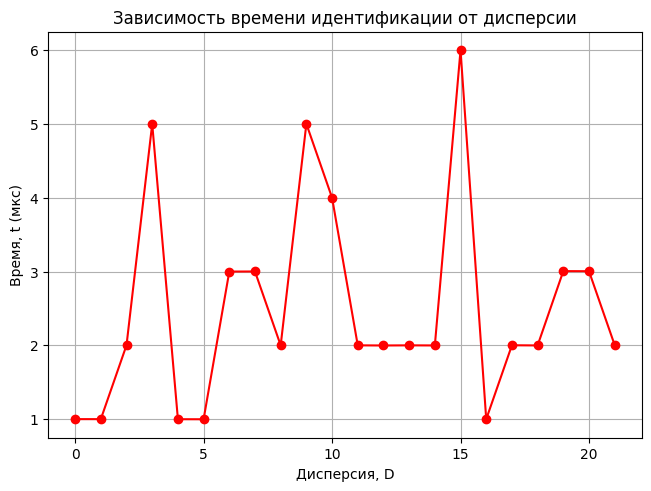

In [173]:
fig, axs = plt.subplots(1, 1, constrained_layout=True)
axs.plot(list_D, list_T, 'o', list_D, list_T, '-', color='red')
axs.set_title('Зависимость времени идентификации от дисперсии')
axs.set_xlabel('Дисперсия, D')
axs.set_ylabel('Время, t (мкс)')
axs.grid(True)
plt.show()